In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [28]:
@tf.function
def f(x, y):
    z = 2 * x + y + 3
    return z

x = tf.linspace(0, 5, 101)
x = tf.cast(x, tf.float32)
y = tf.linspace(0, 5, 101)
y = tf.cast(y, tf.float32)

z = f(x, y) + tf.random.normal(shape=[101])

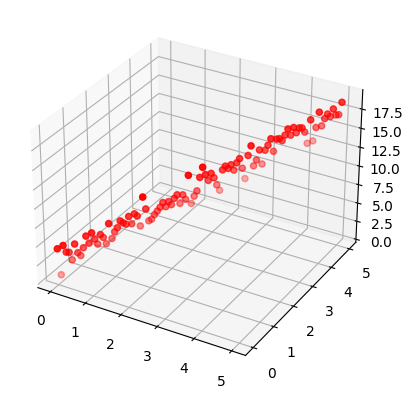

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

In [30]:
class Model(tf.Module):
    def __init__(self, seed=22):
        rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=seed)

        self.w_x = tf.Variable(rand_init[0])
        self.w_y = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])
    
    @tf.function
    def __call__(self, x, y):
        z = self.w_x * x + self.w_y * y + self.b
        return z

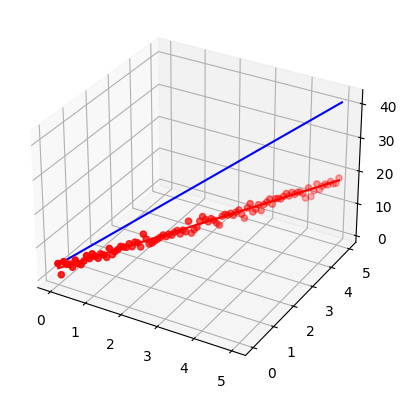

In [31]:
model = Model()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.plot3D(x, y, f(x, y), c='r')
ax.plot3D(x, y, model(x, y), c='b')

In [32]:
def loss(z, z_pred):
    return tf.reduce_mean(tf.square(z - z_pred))

print(loss(z, model(x, y)))

tf.Tensor(194.73457, shape=(), dtype=float32)


In [33]:
epochs = 100
learning_rate = 0.01

model = Model()

with tf.GradientTape() as tape:
    tape.watch(model.variables)
    batch_loss = loss(z, model(x, y))
grads = tape.gradient(batch_loss, model.variables)
print(grads)
for g,v in zip(grads, model.variables):
    v.assign_sub(learning_rate*g)

with tf.GradientTape() as tape:
    tape.watch(model.variables)
    batch_loss = loss(z, model(x, y))
grads = tape.gradient(batch_loss, model.variables)
print(grads)
for g,v in zip(grads, model.variables):
    v.assign_sub(learning_rate*g)

with tf.GradientTape() as tape:
    tape.watch(model.variables)
    batch_loss = loss(z, model(x, y))
print(tape.gradient(batch_loss, model.variables))

(<tf.Tensor: shape=(), dtype=float32, numpy=-12.747607>, <tf.Tensor: shape=(), dtype=float32, numpy=-38.576015>, <tf.Tensor: shape=(), dtype=float32, numpy=-38.576015>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-8.635053>, <tf.Tensor: shape=(), dtype=float32, numpy=-25.01567>, <tf.Tensor: shape=(), dtype=float32, numpy=-25.01567>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-5.9607844>, <tf.Tensor: shape=(), dtype=float32, numpy=-16.203669>, <tf.Tensor: shape=(), dtype=float32, numpy=-16.203669>)


Loss of step 0: 3.594
Loss of step 10: 0.923
Loss of step 20: 0.922
Loss of step 30: 0.922
Loss of step 40: 0.922
Loss of step 50: 0.922
Loss of step 60: 0.922
Loss of step 70: 0.922
Loss of step 80: 0.922
Loss of step 90: 0.922
Loss of step 100: 0.922
Loss of step 110: 0.922
Loss of step 120: 0.922
Loss of step 130: 0.922
Loss of step 140: 0.922
Loss of step 150: 0.922
Loss of step 160: 0.922
Loss of step 170: 0.922
Loss of step 180: 0.922
Loss of step 190: 0.922
Loss of step 200: 0.922
Loss of step 210: 0.922
Loss of step 220: 0.922
Loss of step 230: 0.922
Loss of step 240: 0.922
Loss of step 250: 0.922
Loss of step 260: 0.922
Loss of step 270: 0.922
Loss of step 280: 0.922
Loss of step 290: 0.922
Loss of step 300: 0.922
Loss of step 310: 0.922
Loss of step 320: 0.922
Loss of step 330: 0.922
Loss of step 340: 0.922
Loss of step 350: 0.922
Loss of step 360: 0.922
Loss of step 370: 0.922
Loss of step 380: 0.922
Loss of step 390: 0.922
Loss of step 400: 0.922
Loss of step 410: 0.922
Los

Text(0, 0.5, 'Loss (MSE)')

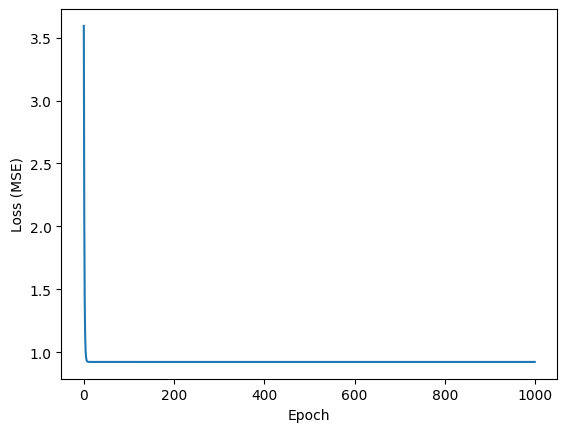

In [34]:
epochs = 1000
learning_rate = 0.01
losses = []

model = Model()

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        tape.watch(model.variables)
        batch_loss = loss(z, model(x, y))
    grads = tape.gradient(batch_loss, model.variables)
    for g,v in zip(grads, model.variables):
        v.assign_sub(learning_rate*g)

    loss_v = loss(z, model(x,y ))
    losses.append(loss_v)
    if epoch % 10 == 0:
        print(f'Loss of step {epoch}: {loss_v.numpy():0.3f}')

plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")

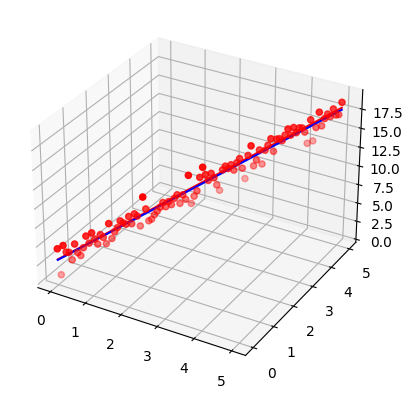

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.plot3D(x, y, f(x, y), c='r')
ax.plot3D(x, y, model(x, y), c='b')

In [36]:
print(loss(z, model(x, y)))
print(loss(z, f(x,y )))

tf.Tensor(0.9223384, shape=(), dtype=float32)
tf.Tensor(0.9513635, shape=(), dtype=float32)
